In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

from IPython.display import display
pd.options.display.max_columns = None

In [20]:
total4 = pd.read_csv('total4.csv')
mfile = pd.read_csv('mfile_model.csv', encoding = 'utf-8')


In [120]:
memberA = pd.read_csv('memberA.csv')
memberB = pd.read_csv('memberB.csv')
memberC = pd.read_csv('memberC.csv')
memberD = pd.read_csv('memberD.csv')

In [12]:
dt_A = pd.read_csv('dt_A.csv')
dt_B = pd.read_csv('dt_B.csv')
dt_C = pd.read_csv('dt_C.csv')
dt_D = pd.read_csv('dt_D.csv')

In [3]:
mA=  memberA.drop(['성별','연령대_4560대','조합원상태','연령',"구","동","회원번호","연령60이상",'주말'],axis=1,inplace=False)
mA = pd.get_dummies(mA)
mA_scaled = mA.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']]
mA.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']] = scaler.fit_transform(mA_scaled)

In [5]:
avg = {}
for i in range(2,16):
    clus=KMeans(i, random_state =1234)
    clus.fit(mA)
    cluster_kmeans=[j+1 for j in clus.labels_]
    mA["ClusterKmeans"]=cluster_kmeans
    
    average_score = silhouette_score(mA.drop(['ClusterKmeans'], axis = 1), mA['ClusterKmeans'])
    avg[i] = average_score
    print(i,":", avg[i])

2 : 0.12388690159600199
3 : 0.2918316870871331
4 : 0.32951813121036455
5 : 0.33174758986857217
6 : 0.3501842421812115
7 : 0.3359317558532846
8 : 0.23052336846396565
9 : 0.24659070981955117
10 : 0.19433672258199847
11 : 0.21412358740793405
12 : 0.20868153926912447
13 : 0.19900570171008541
14 : 0.18909989154423146
15 : 0.20162323114642788


In [6]:
clus=KMeans(11, random_state= 0)
clus.fit(mA)
cluster_kmeans=[j+1 for j in clus.labels_]
mA["ClusterKmeans"]=cluster_kmeans

In [7]:
ds_summary_km=mA.groupby("ClusterKmeans").agg(["mean"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km

,ClusterKmeans,배송서비스신청여부_mean,모바일알람여부_mean,Gold_member_mean,구매금액_mean,방문횟수_mean,간식_mean,건강_mean,과실_mean,기타_mean,반찬_mean,생활용품_mean,서류_mean,수산_mean,양념/가루_mean,음료_mean,잡곡_mean,주곡_mean,주류_mean,채소_mean,축산물_mean,평일_mean,1회당평균구매물품수_mean,거리_mean,연령대_20대이하_mean,연령대_30대_mean,연령대_40대_mean,연령대_50대_mean,연령대_60대_mean,연령대_70대이상_mean,구매매장_매장A_mean
0,1,0.645570,0.000000,0.000000,0.076443,0.093259,0.123028,0.005505,0.022989,0.000751,0.364828,0.029391,0.013549,0.056796,0.033222,0.026981,0.010718,0.013473,0.003671,0.164283,0.130816,0.607814,0.200013,0.116297,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1
1,2,0.014440,0.025271,0.000000,0.020238,0.026075,0.209946,0.034754,0.025036,0.003147,0.109836,0.062596,0.006251,0.063276,0.058521,0.088597,0.012547,0.018601,0.005060,0.168396,0.133439,0.246272,0.150514,0.157942,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
2,3,0.006667,0.486667,0.040000,0.083010,0.115944,0.106583,0.009204,0.024876,0.000090,0.111232,0.080090,0.014559,0.054536,0.034573,0.078803,0.006266,0.009469,0.014578,0.249556,0.205587,0.343302,0.175413,0.163056,0.000000,0.466667,0.433333,0.100000,0.000000,0.000000,1
3,4,0.169903,0.043689,0.000000,0.049623,0.065680,0.154897,0.009530,0.024568,0.000783,0.136119,0.050538,0.009461,0.084672,0.069191,0.045113,0.024264,0.020443,0.001311,0.247013,0.122097,0.471483,0.161813,0.172431,0.082524,0.000000,0.000000,0.000000,0.436893,0.480583,1
4,5,0.252174,0.078261,0.000000,0.036503,0.047512,0.592745,0.010747,0.009946,0.000404,0.044796,0.041240,0.007296,0.040919,0.038449,0.037015,0.003709,0.012000,0.000216,0.073411,0.087106,0.626611,0.164869,0.184601,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1
5,6,0.000000,0.057915,0.007722,0.037842,0.053170,0.134861,0.020299,0.024270,0.003925,0.156283,0.070814,0.008712,0.099052,0.054716,0.107555,0.014437,0.017408,0.002260,0.137327,0.148082,0.775034,0.157152,0.154681,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1
6,7,0.000000,0.049383,0.024691,0.072005,0.087163,0.164786,0.022205,0.038235,0.000495,0.127079,0.038858,0.010278,0.090222,0.072565,0.050350,0.016666,0.021295,0.001505,0.229576,0.109713,0.793728,0.172577,0.140432,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1
7,8,0.000000,0.000000,0.000000,0.025085,0.022867,0.242015,0.030770,0.045952,0.000000,0.066407,0.124646,0.006670,0.064576,0.080386,0.090201,0.003138,0.014302,0.002232,0.057909,0.160592,0.184171,0.167305,0.138393,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1
8,9,0.000000,0.000000,0.000000,0.026823,0.039665,0.178184,0.027603,0.022347,0.001795,0.139640,0.072031,0.013141,0.084830,0.042239,0.078636,0.013700,0.017935,0.001367,0.156753,0.147689,0.865909,0.153758,0.124253,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
9,10,0.651786,0.348214,0.071429,0.166874,0.194277,0.175675,0.011637,0.023209,0.001192,0.117177,0.038327,0.010336,0.063426,0.059753,0.060548,0.021186,0.016334,0.001728,0.212142,0.187329,0.643003,0.200769,0.091890,0.000000,0.000000,0.651786,0.348214,0.000000,0.000000,1


In [20]:
mB=  memberB.drop(['성별','연령대_4560대','조합원상태','연령',"구","동","회원번호","연령60이상",'주말'],axis=1,inplace=False)
mB = pd.get_dummies(mB)
mB_scaled = mB.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']]
mB.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']] = scaler.fit_transform(mB_scaled)

clus=KMeans(5, random_state= 0)
clus.fit(mB)
cluster_kmeans=[j+1 for j in clus.labels_]
mB["ClusterKmeans"]=cluster_kmeans

ds_summary_km=mB.groupby("ClusterKmeans").agg(["mean"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km

,ClusterKmeans,배송서비스신청여부_mean,모바일알람여부_mean,Gold_member_mean,구매금액_mean,방문횟수_mean,간식_mean,건강_mean,과실_mean,기타_mean,반찬_mean,생활용품_mean,서류_mean,수산_mean,양념/가루_mean,음료_mean,잡곡_mean,주곡_mean,주류_mean,채소_mean,축산물_mean,평일_mean,1회당평균구매물품수_mean,거리_mean,연령대_20대이하_mean,연령대_30대_mean,연령대_40대_mean,연령대_50대_mean,연령대_60대_mean,연령대_70대이상_mean,구매매장_매장B_mean
0,1,0.080515,0.057971,0.001610,0.029438,0.045340,0.203288,0.020098,0.017862,0.002858,0.116429,0.048334,0.009823,0.069249,0.056209,0.097314,0.013738,0.018139,0.000708,0.152780,0.173171,0.617481,0.191145,0.139381,0.000000,1,0,0,0,0.000000,1
1,2,0.103448,0.068966,0.009251,0.039847,0.055188,0.191225,0.019921,0.014085,0.001777,0.131897,0.054318,0.009538,0.084448,0.056836,0.081574,0.015687,0.011625,0.001341,0.157934,0.167794,0.620787,0.204422,0.109149,0.000000,0,1,0,0,0.000000,1
2,3,0.116239,0.076923,0.017094,0.056408,0.072799,0.164229,0.020554,0.023359,0.000716,0.133216,0.039254,0.007890,0.070149,0.062392,0.056903,0.016994,0.009855,0.005576,0.225997,0.162915,0.597232,0.203414,0.119041,0.000000,0,0,1,0,0.000000,1
3,4,0.093458,0.023364,0.014019,0.048389,0.066910,0.131701,0.015181,0.026371,0.000302,0.141055,0.039951,0.010060,0.064633,0.071368,0.056158,0.015792,0.018454,0.004165,0.235973,0.168836,0.616858,0.196780,0.112279,0.051402,0,0,0,0,0.948598,1
4,5,0.141243,0.028249,0.011299,0.051301,0.069156,0.153264,0.011317,0.016910,0.000245,0.149441,0.027209,0.010612,0.067746,0.065738,0.060816,0.022466,0.015771,0.000695,0.221965,0.175806,0.627524,0.206410,0.130100,0.000000,0,0,0,1,0.000000,1


In [22]:
mC=  memberC.drop(['성별','연령대_4560대','조합원상태','연령',"구","동","회원번호","연령60이상",'주말'],axis=1,inplace=False)
mC = pd.get_dummies(mC)
mC_scaled = mC.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']]
mC.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']] = scaler.fit_transform(mC_scaled)

clus=KMeans(5, random_state= 0)
clus.fit(mC)
cluster_kmeans=[j+1 for j in clus.labels_]
mC["ClusterKmeans"]=cluster_kmeans

ds_summary_km=mC.groupby("ClusterKmeans").agg(["mean"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km

,ClusterKmeans,배송서비스신청여부_mean,모바일알람여부_mean,Gold_member_mean,구매금액_mean,방문횟수_mean,간식_mean,건강_mean,과실_mean,기타_mean,반찬_mean,생활용품_mean,서류_mean,수산_mean,양념/가루_mean,음료_mean,잡곡_mean,주곡_mean,주류_mean,채소_mean,축산물_mean,평일_mean,1회당평균구매물품수_mean,거리_mean,연령대_20대이하_mean,연령대_30대_mean,연령대_40대_mean,연령대_50대_mean,연령대_60대_mean,연령대_70대이상_mean,구매매장_매장C_mean
0,1,0.091509,0.122642,0.038679,0.037841,0.089584,0.147562,0.012305,0.023857,0.001199,0.152063,0.043567,0.008170,0.075419,0.055264,0.049501,0.023218,0.015540,0.000988,0.207524,0.183826,0.616135,0.087781,0.114434,0.000000,0,0,1,0,0.000000,1
1,2,0.088496,0.023599,0.029499,0.030416,0.082476,0.117543,0.007419,0.028723,0.001409,0.156707,0.030639,0.009970,0.061494,0.081125,0.038015,0.022994,0.021661,0.000094,0.253385,0.168821,0.613661,0.083852,0.093289,0.050147,0,0,0,0,0.949853,1
2,3,0.042553,0.101377,0.012516,0.020879,0.062978,0.202294,0.010183,0.022174,0.000803,0.144627,0.036715,0.014041,0.060641,0.055302,0.090023,0.006387,0.014435,0.001130,0.169362,0.171884,0.630649,0.082859,0.124468,0.000000,1,0,0,0,0.000000,1
3,4,0.089027,0.039337,0.026915,0.032895,0.079831,0.163912,0.009056,0.027310,0.000695,0.145773,0.029056,0.012809,0.084037,0.064535,0.034676,0.013747,0.017969,0.001040,0.233610,0.161775,0.637697,0.092313,0.176294,0.000000,0,0,0,1,0.000000,1
4,5,0.079929,0.113085,0.030195,0.031796,0.084135,0.166507,0.020044,0.018407,0.001172,0.149671,0.046997,0.010192,0.074567,0.052578,0.066266,0.010893,0.015381,0.001416,0.188857,0.177051,0.640386,0.087150,0.098579,0.000000,0,1,0,0,0.000000,1


In [49]:
memberD['ClusterKmeans'] = cluster_kmeans

In [154]:
memberD_20 = memberD[memberD['연령대'] == "20대이하"]
memberD_20

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구매금액,구,동,연령60이상,방문횟수,연령대_4560대,구매매장,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,주말,평일,1회당평균구매물품수,거리
274,1246159232,1,0,28.0,1,0,0,20대이하,611255.0,수지구,성복동,0,23,0,매장D,0.480519,0.000000,0.000000,0.0,0.090909,0.051948,0.000000,0.012987,0.090909,0.090909,0.012987,0.000000,0.0,0.038961,0.129870,0.086957,0.913043,3.347826,7
349,1315016832,1,0,25.0,0,0,0,20대이하,980560.0,수지구,신봉동,0,39,0,매장D,0.023810,0.023810,0.000000,0.0,0.380952,0.015873,0.007937,0.007937,0.015873,0.000000,0.000000,0.039683,0.0,0.174603,0.309524,0.384615,0.615385,3.230769,2
494,1501880768,1,0,29.0,0,0,0,20대이하,33407.0,기흥구,상갈동,0,2,0,매장D,0.800000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.000000,0.000000,0.500000,0.500000,2.500000,19
575,1577097024,1,1,26.0,0,0,0,20대이하,17326.0,수원 영통구,기타,0,1,0,매장D,0.000000,0.000000,0.000000,0.0,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,3.000000,18
622,1628543488,1,0,28.0,0,0,0,20대이하,34651.0,수지구,신봉동,0,3,0,매장D,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.666667,0.333333,0.000000,1.000000,1.000000,2
1274,595597824,1,0,29.0,0,0,0,20대이하,973265.0,수지구,신봉동,0,44,0,매장D,0.137931,0.000000,0.008621,0.0,0.068966,0.008621,0.008621,0.043103,0.103448,0.000000,0.051724,0.051724,0.0,0.456897,0.060345,0.386364,0.613636,2.636364,2
1688,762608128,1,0,27.0,1,0,0,20대이하,774856.0,수지구,상현동,0,28,0,매장D,0.228916,0.024096,0.024096,0.0,0.072289,0.024096,0.012048,0.060241,0.036145,0.048193,0.036145,0.012048,0.0,0.120482,0.301205,0.285714,0.714286,2.964286,8
2023,986089088,1,1,27.0,0,0,0,20대이하,37331.0,기타,기타,0,2,0,매장D,0.666667,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.500000,20


# 연령층별로 군집을 형성해보자

In [121]:
memberD_30 = memberD[memberD['연령대'] == "30대"]
memberD_40 = memberD[memberD['연령대'] == "40대"]
memberD_50 = memberD[memberD['연령대'] == "50대"]
memberD_60 = memberD[memberD['연령대'] == "60대"]
memberD_70 = memberD[memberD['연령대'] == "70대이상"]

In [122]:
mD_30 =  memberD_30.drop(['성별','연령대_4560대','조합원상태','연령',"구","동","회원번호","연령60이상",'주말'],axis=1,inplace=False)
mD_30 = pd.get_dummies(mD_30)
mD_30_scaled = mD_30.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']]
mD_30.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']] = scaler.fit_transform(mD_30_scaled)

In [123]:
mD_40 =  memberD_40.drop(['성별','연령대_4560대','조합원상태','연령',"구","동","회원번호","연령60이상",'주말'],axis=1,inplace=False)
mD_40 = pd.get_dummies(mD_40)
mD_40_scaled = mD_40.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']]
mD_40.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']] = scaler.fit_transform(mD_40_scaled)

mD_50 =  memberD_50.drop(['성별','연령대_4560대','조합원상태','연령',"구","동","회원번호","연령60이상",'주말'],axis=1,inplace=False)
mD_50 = pd.get_dummies(mD_50)
mD_50_scaled = mD_50.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']]
mD_50.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']] = scaler.fit_transform(mD_50_scaled)

mD_60 =  memberD_60.drop(['성별','연령대_4560대','조합원상태','연령',"구","동","회원번호","연령60이상",'주말'],axis=1,inplace=False)
mD_60 = pd.get_dummies(mD_60)
mD_60_scaled = mD_60.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']]
mD_60.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']] = scaler.fit_transform(mD_60_scaled)

mD_70 =  memberD_70.drop(['성별','연령대_4560대','조합원상태','연령',"구","동","회원번호","연령60이상",'주말'],axis=1,inplace=False)
mD_70 = pd.get_dummies(mD_70)
mD_70_scaled = mD_70.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']]
mD_70.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']] = scaler.fit_transform(mD_70_scaled)

In [125]:
avg = {}
for i in range(2,10):
    clus=KMeans(i, random_state =1234)
    clus.fit(mD_30)
    cluster_kmeans=[j+1 for j in clus.labels_]
    mD_30["ClusterKmeans"]=cluster_kmeans
    
    average_score = silhouette_score(mD_30.drop(['ClusterKmeans'], axis = 1), mD_30['ClusterKmeans'])
    avg[i] = average_score
    print(i,":", avg[i])

2 : 0.19670788730464783
3 : 0.21156479926315389
4 : 0.2327190928715699
5 : 0.16825203076952966
6 : 0.17484576277731273
7 : 0.17793254462063215
8 : 0.16538446543063567
9 : 0.1685674947735588


In [127]:
avg = {}
for i in range(2,10):
    clus=KMeans(i, random_state =1234)
    clus.fit(mD_40)
    cluster_kmeans=[j+1 for j in clus.labels_]
    mD_40["ClusterKmeans"]=cluster_kmeans
    
    average_score = silhouette_score(mD_40.drop(['ClusterKmeans'], axis = 1), mD_40['ClusterKmeans'])
    avg[i] = average_score
    print(i,":", avg[i])

2 : 0.3194283340120987
3 : 0.2812306983719861
4 : 0.1990868731952975
5 : 0.1752608786277906
6 : 0.163832406533782
7 : 0.17309951314779676
8 : 0.10492137622445079
9 : 0.11159426023086479


In [133]:
avg = {}
for i in range(2,10):
    clus=KMeans(i, random_state =1234)
    clus.fit(mD_50)
    cluster_kmeans=[j+1 for j in clus.labels_]
    mD_50["ClusterKmeans"]=cluster_kmeans
    
    average_score = silhouette_score(mD_50.drop(['ClusterKmeans'], axis = 1), mD_50['ClusterKmeans'])
    avg[i] = average_score
    print(i,":", avg[i])

2 : 0.2407387311443843
3 : 0.28326011119420363
4 : 0.23650753148567105
5 : 0.17793147360868297
6 : 0.18920240682802247
7 : 0.1291409018871942
8 : 0.14748066064595652
9 : 0.1617428761398186


In [134]:
avg = {}
for i in range(2,10):
    clus=KMeans(i, random_state =1234)
    clus.fit(mD_60)
    cluster_kmeans=[j+1 for j in clus.labels_]
    mD_60["ClusterKmeans"]=cluster_kmeans
    
    average_score = silhouette_score(mD_60.drop(['ClusterKmeans'], axis = 1), mD_60['ClusterKmeans'])
    avg[i] = average_score
    print(i,":", avg[i])

2 : 0.2902507504845821
3 : 0.27347771241251206
4 : 0.14388116226492767
5 : 0.15559751488399037
6 : 0.16673318082702115
7 : 0.1289224462707489
8 : 0.11321621236720371
9 : 0.11650492957241507


In [135]:
avg = {}
for i in range(2,10):
    clus=KMeans(i, random_state =1234)
    clus.fit(mD_70)
    cluster_kmeans=[j+1 for j in clus.labels_]
    mD_70["ClusterKmeans"]=cluster_kmeans
    
    average_score = silhouette_score(mD_70.drop(['ClusterKmeans'], axis = 1), mD_70['ClusterKmeans'])
    avg[i] = average_score
    print(i,":", avg[i])

2 : 0.3040350204586898
3 : 0.21285922928676254
4 : 0.21008110378586925
5 : 0.1646683503269268
6 : 0.16703695548686673
7 : 0.17765795329825768
8 : 0.1939200906829344
9 : 0.20110979118748043


In [170]:
clus=KMeans(3, random_state= 0)
clus.fit(mD_30)
cluster_kmeans=[j+1 for j in clus.labels_]
mD_30["ClusterKmeans"]=cluster_kmeans

ds_summary_km=mD_30.groupby("ClusterKmeans").agg(["mean"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km

,ClusterKmeans,배송서비스신청여부_mean,모바일알람여부_mean,Gold_member_mean,구매금액_mean,방문횟수_mean,간식_mean,건강_mean,과실_mean,기타_mean,반찬_mean,생활용품_mean,서류_mean,수산_mean,양념/가루_mean,음료_mean,잡곡_mean,주곡_mean,주류_mean,채소_mean,축산물_mean,평일_mean,1회당평균구매물품수_mean,거리_mean,연령대_30대_mean,구매매장_매장D_mean
0,1,0.000000,0.152542,0,0.092250,0.146122,0.191987,0.042849,0.032532,0.000179,0.121785,0.065795,0.016030,0.083883,0.039484,0.106288,0.001317,0.007860,0.002083,0.190284,0.097645,0.881145,0.224273,0.467514,1,1
1,2,0.000000,0.022222,0,0.089522,0.140404,0.169239,0.006073,0.023506,0.000905,0.113701,0.052821,0.009044,0.075672,0.057442,0.090067,0.011330,0.011192,0.002052,0.159083,0.210466,0.775570,0.219926,0.085597,1,1
2,3,0.233766,0.064935,0,0.076851,0.082645,0.230737,0.028087,0.034291,0.000433,0.059399,0.070518,0.005683,0.055549,0.066743,0.095848,0.005493,0.018304,0.004099,0.150356,0.174460,0.220707,0.256388,0.287518,1,1


In [171]:
clus=KMeans(5, random_state= 0)
clus.fit(mD_40)
cluster_kmeans=[j+1 for j in clus.labels_]
mD_40["ClusterKmeans"]=cluster_kmeans

ds_summary_km=mD_40.groupby("ClusterKmeans").agg(["mean"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km

,ClusterKmeans,배송서비스신청여부_mean,모바일알람여부_mean,Gold_member_mean,구매금액_mean,방문횟수_mean,간식_mean,건강_mean,과실_mean,기타_mean,반찬_mean,생활용품_mean,서류_mean,수산_mean,양념/가루_mean,음료_mean,잡곡_mean,주곡_mean,주류_mean,채소_mean,축산물_mean,평일_mean,1회당평균구매물품수_mean,거리_mean,연령대_40대_mean,구매매장_매장D_mean
0,1,0,0,0.000000,0.044447,0.061566,0.121401,0.017536,0.021321,0.000813,0.168637,0.071794,0.009035,0.077649,0.050512,0.053760,0.019069,0.015448,0.000936,0.218580,0.153508,0.408075,0.121792,0.065176,1,1
1,2,0,0,0.000000,0.034519,0.045720,0.309294,0.002886,0.010931,0.000103,0.069935,0.024947,0.010842,0.047033,0.048758,0.075619,0.002350,0.007836,0.000303,0.104319,0.284844,0.603305,0.123619,0.178008,1,1
2,3,0,0,0.000000,0.015799,0.021915,0.120491,0.025575,0.032552,0.005958,0.121333,0.098349,0.008603,0.081606,0.080929,0.082538,0.017907,0.021609,0.001887,0.201508,0.094438,0.934027,0.119083,0.274764,1,1
3,4,0,1,0.180328,0.169814,0.249262,0.153860,0.018111,0.037966,0.000195,0.141721,0.083846,0.007804,0.068050,0.052669,0.036838,0.017334,0.014160,0.000486,0.231481,0.135479,0.655138,0.131606,0.135701,1,1
4,5,1,0,0.000000,0.108299,0.131637,0.175328,0.006139,0.025727,0.000920,0.126924,0.041259,0.007530,0.063815,0.048117,0.070195,0.012900,0.017833,0.001474,0.177391,0.224448,0.644833,0.167622,0.112903,1,1


In [146]:
clus=KMeans(3, random_state= 0)
clus.fit(mD_50)
cluster_kmeans=[j+1 for j in clus.labels_]
mD_50["ClusterKmeans"]=cluster_kmeans

ds_summary_km=mD_50.groupby("ClusterKmeans").agg(["mean"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km

,ClusterKmeans,배송서비스신청여부_mean,모바일알람여부_mean,Gold_member_mean,구매금액_mean,방문횟수_mean,간식_mean,건강_mean,과실_mean,기타_mean,반찬_mean,생활용품_mean,서류_mean,수산_mean,양념/가루_mean,음료_mean,잡곡_mean,주곡_mean,주류_mean,채소_mean,축산물_mean,평일_mean,1회당평균구매물품수_mean,거리_mean,연령대_50대_mean,구매매장_매장D_mean
0,1,0.000000,0.000000,0.000000,0.046571,0.063284,0.161876,0.024323,0.024596,0.001324,0.130581,0.036975,0.007952,0.078090,0.065613,0.045630,0.018534,0.012678,0.000655,0.210466,0.180707,0.454313,0.240384,0.118451,1,1
1,2,0.304054,0.000000,0.000000,0.046486,0.057709,0.186613,0.017845,0.040509,0.000177,0.163740,0.065173,0.013729,0.104283,0.056400,0.052261,0.014159,0.019306,0.000193,0.112324,0.153287,0.801213,0.258182,0.234234,1,1
2,3,0.000000,0.409091,0.068182,0.081834,0.118568,0.076365,0.001189,0.019057,0.001420,0.084395,0.025380,0.007447,0.066129,0.155808,0.027904,0.005637,0.008502,0.000180,0.422271,0.098316,0.781059,0.222830,0.136679,1,1


In [152]:
clus=KMeans(2, random_state= 0)
clus.fit(mD_60)
cluster_kmeans=[j+1 for j in clus.labels_]
mD_60["ClusterKmeans"]=cluster_kmeans

ds_summary_km=mD_60.groupby("ClusterKmeans").agg(["mean"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km

,ClusterKmeans,배송서비스신청여부_mean,모바일알람여부_mean,Gold_member_mean,구매금액_mean,방문횟수_mean,간식_mean,건강_mean,과실_mean,기타_mean,반찬_mean,생활용품_mean,서류_mean,수산_mean,양념/가루_mean,음료_mean,잡곡_mean,주곡_mean,주류_mean,채소_mean,축산물_mean,평일_mean,1회당평균구매물품수_mean,거리_mean,연령대_60대_mean,구매매장_매장D_mean
0,1,0.000000,0.044118,0.000000,0.046747,0.110980,0.120341,0.015077,0.040298,0.000000,0.148682,0.043222,0.006659,0.119677,0.056413,0.042927,0.035034,0.010783,0.000475,0.249671,0.110741,0.592025,0.138444,0.139706,1,1
1,2,0.210526,0.035088,0.039474,0.051567,0.115485,0.155869,0.007352,0.025940,0.000834,0.144984,0.023359,0.010728,0.075384,0.071504,0.037704,0.021838,0.020085,0.001628,0.237406,0.165385,0.666817,0.144721,0.167105,1,1


In [153]:
clus=KMeans(2, random_state= 0)
clus.fit(mD_70)
cluster_kmeans=[j+1 for j in clus.labels_]
mD_70["ClusterKmeans"]=cluster_kmeans

ds_summary_km=mD_70.groupby("ClusterKmeans").agg(["mean"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km

,ClusterKmeans,배송서비스신청여부_mean,모바일알람여부_mean,Gold_member_mean,구매금액_mean,방문횟수_mean,간식_mean,건강_mean,과실_mean,기타_mean,반찬_mean,생활용품_mean,서류_mean,수산_mean,양념/가루_mean,음료_mean,잡곡_mean,주곡_mean,주류_mean,채소_mean,축산물_mean,평일_mean,1회당평균구매물품수_mean,거리_mean,연령대_70대이상_mean,구매매장_매장D_mean
0,1,0.0,0.030075,0.037594,0.108659,0.121652,0.059625,0.005959,0.022707,0.000072,0.219064,0.015014,0.009218,0.047145,0.073856,0.017491,0.014303,0.009938,0.000140,0.328644,0.176823,0.687813,0.117356,0.050125,1,1
1,2,0.2,0.008000,0.000000,0.051825,0.062652,0.188275,0.012575,0.036952,0.008000,0.127686,0.028307,0.015052,0.099331,0.059281,0.083597,0.028400,0.028881,0.002229,0.172673,0.108760,0.586776,0.147396,0.181067,1,1


In [12]:
mD=  memberD.drop(['성별','연령대_4560대','조합원상태','연령',"구","동","회원번호","연령60이상",'주말'],axis=1,inplace=False)
mD = pd.get_dummies(mD)
mD_scaled = mD.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']]
mD.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']] = scaler.fit_transform(mD_scaled)

In [4]:
avg = {}
for i in range(2,30):
    clus=KMeans(i, random_state =1234)
    clus.fit(mD)
    cluster_kmeans=[j+1 for j in clus.labels_]
    mD["ClusterKmeans"]=cluster_kmeans
    
    average_score = silhouette_score(mD.drop(['ClusterKmeans'], axis = 1), mD['ClusterKmeans'])
    avg[i] = average_score
    print(i,":", avg[i])

2 : 0.07228802922990424
3 : 0.23283949841954818
4 : 0.2835070347179848
5 : 0.3992372334760084
6 : 0.37163861824971345
7 : 0.32379608675744914
8 : 0.29790031275657897
9 : 0.26095462351957927
10 : 0.27788123750328614
11 : 0.28985275917927156
12 : 0.2756946213904078
13 : 0.2787846106745295
14 : 0.2545137357121104
15 : 0.24022958468386685
16 : 0.2154462263444511
17 : 0.21862269371857915
18 : 0.21180527621696893
19 : 0.21483675018372972
20 : 0.19585796028975222
21 : 0.1991609322238956
22 : 0.171964060724352
23 : 0.1732800730051344
24 : 0.17254032102005587
25 : 0.16536335099105565
26 : 0.17052663793610418
27 : 0.15795581872868725
28 : 0.15907470135765372
29 : 0.15685304652725524


In [23]:
mD=  memberD.drop(['성별','연령대_4560대','조합원상태','연령',"구","동","회원번호","연령60이상",'주말'],axis=1,inplace=False)
mD = pd.get_dummies(mD)
mD_scaled = mD.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']]
mD.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']] = scaler.fit_transform(mD_scaled)

clus=KMeans(5, random_state= 0)
clus.fit(mD)
cluster_kmeans=[j+1 for j in clus.labels_]
mD["ClusterKmeans"]=cluster_kmeans

ds_summary_km=mD.groupby("ClusterKmeans").agg(["mean"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km

,ClusterKmeans,배송서비스신청여부_mean,모바일알람여부_mean,Gold_member_mean,구매금액_mean,방문횟수_mean,간식_mean,건강_mean,과실_mean,기타_mean,반찬_mean,생활용품_mean,서류_mean,수산_mean,양념/가루_mean,음료_mean,잡곡_mean,주곡_mean,주류_mean,채소_mean,축산물_mean,평일_mean,1회당평균구매물품수_mean,거리_mean,연령대_20대이하_mean,연령대_30대_mean,연령대_40대_mean,연령대_50대_mean,연령대_60대_mean,연령대_70대이상_mean,구매매장_매장D_mean
0,1,0.104895,0.083916,0.013986,0.046662,0.064941,0.152869,0.017343,0.028950,0.000948,0.132546,0.044324,0.009842,0.084673,0.080936,0.044282,0.014379,0.014108,0.000398,0.220055,0.154347,0.641014,0.127307,0.162134,0.000000,0.000000,0,1,0.000000,0.000000,1
1,2,0.087447,0.086037,0.015515,0.042042,0.061695,0.173424,0.015500,0.024020,0.002139,0.125002,0.066935,0.009099,0.069499,0.059165,0.067557,0.014048,0.015574,0.001078,0.183748,0.171803,0.653837,0.126270,0.164982,0.000000,0.000000,1,0,0.000000,0.000000,1
2,3,0.065693,0.062044,0.000000,0.032320,0.045969,0.194920,0.020112,0.028223,0.000606,0.101370,0.061226,0.009505,0.070957,0.055560,0.095415,0.008139,0.012350,0.002611,0.161607,0.173750,0.643007,0.136033,0.228812,0.010949,0.989051,0,0,0.000000,0.000000,1
3,4,0.136612,0.038251,0.024590,0.050357,0.075781,0.143754,0.010248,0.031199,0.000520,0.146012,0.030820,0.009190,0.091631,0.065853,0.039819,0.026756,0.016552,0.001191,0.241102,0.145354,0.639828,0.125110,0.130844,0.005464,0.000000,0,0,0.994536,0.000000,1
4,5,0.095785,0.019157,0.019157,0.061442,0.093784,0.121174,0.009150,0.029301,0.003868,0.174506,0.021302,0.011970,0.071792,0.066484,0.048950,0.021089,0.019247,0.001139,0.255142,0.144888,0.640058,0.121254,0.093550,0.011494,0.000000,0,0,0.000000,0.988506,1


In [3]:
mD=  memberD.drop(['성별','연령대_4560대','조합원상태','연령',"구","동","회원번호","연령60이상",'주말'],axis=1,inplace=False)
mD = pd.get_dummies(mD)
mD_scaled = mD.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']]
mD.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']] = scaler.fit_transform(mD_scaled)

clus=KMeans(12, random_state= 0)
clus.fit(mD)
cluster_kmeans=[j+1 for j in clus.labels_]
mD["ClusterKmeans"]=cluster_kmeans

ds_summary_km=mD.groupby("ClusterKmeans").agg(["mean"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km

,ClusterKmeans,배송서비스신청여부_mean,모바일알람여부_mean,Gold_member_mean,구매금액_mean,방문횟수_mean,간식_mean,건강_mean,과실_mean,기타_mean,반찬_mean,생활용품_mean,서류_mean,수산_mean,양념/가루_mean,음료_mean,잡곡_mean,주곡_mean,주류_mean,채소_mean,축산물_mean,평일_mean,1회당평균구매물품수_mean,거리_mean,연령대_20대이하_mean,연령대_30대_mean,연령대_40대_mean,연령대_50대_mean,연령대_60대_mean,연령대_70대이상_mean,구매매장_매장D_mean
0,1,0.000000,1.000000,0.180328,0.143117,0.225456,0.153860,0.018111,0.037966,0.000195,0.141721,0.083846,0.007804,0.068050,0.052669,0.036838,0.017334,0.014160,0.000486,0.231481,0.135479,0.655138,0.131606,0.135701,0.000000,0,1.000000,0.000000,0,0.000000,1
1,2,0.000000,0.000000,0.000000,0.011424,0.013483,0.288076,0.010212,0.020209,0.000000,0.050446,0.056542,0.011532,0.080678,0.058059,0.084318,0.017222,0.005370,0.002857,0.064222,0.243114,0.931113,0.120555,0.355357,0.014286,0,0.985714,0.000000,0,0.000000,1
2,3,0.000000,0.212329,0.041096,0.062116,0.086848,0.197664,0.026864,0.017880,0.000856,0.139935,0.048082,0.005066,0.069963,0.071367,0.050098,0.020264,0.010257,0.000201,0.165276,0.176227,0.323262,0.121224,0.154110,0.000000,0,0.000000,1.000000,0,0.000000,1
3,4,1.000000,0.000000,0.000000,0.089020,0.114583,0.168813,0.009017,0.031947,0.000000,0.136597,0.025536,0.009143,0.092037,0.054646,0.036946,0.019931,0.017327,0.001350,0.258741,0.137968,0.612062,0.175037,0.119792,0.000000,0,0.000000,0.000000,1,0.000000,1
4,5,0.066421,0.062731,0.000000,0.032630,0.046436,0.191665,0.020334,0.028535,0.000613,0.100032,0.060674,0.009610,0.071742,0.056175,0.095241,0.007491,0.012487,0.002640,0.163396,0.175673,0.640900,0.136019,0.226117,0.000000,1,0.000000,0.000000,0,0.000000,1
5,6,0.096154,0.019231,0.019231,0.061659,0.094101,0.121640,0.009186,0.029414,0.003883,0.175177,0.021384,0.012016,0.072068,0.066740,0.049138,0.021170,0.019321,0.001143,0.253559,0.144163,0.638674,0.121494,0.093910,0.007692,0,0.000000,0.000000,0,0.992308,1
6,7,1.000000,0.000000,0.000000,0.091657,0.119645,0.180934,0.006323,0.025299,0.000891,0.125508,0.041158,0.007483,0.062965,0.048599,0.070175,0.013265,0.017464,0.001428,0.174338,0.224170,0.650109,0.168186,0.114149,0.031250,0,0.968750,0.000000,0,0.000000,1
7,8,0.000000,0.000000,0.000000,0.016253,0.017831,0.215664,0.014818,0.019199,0.000000,0.120563,0.080474,0.001849,0.074610,0.062932,0.089647,0.006066,0.012005,0.000725,0.173898,0.127552,0.089194,0.127969,0.271981,0.000000,0,1.000000,0.000000,0,0.000000,1
8,9,0.000000,0.000000,0.000000,0.035918,0.056095,0.117227,0.019131,0.024271,0.004346,0.153709,0.068910,0.011055,0.063940,0.061220,0.057611,0.015597,0.020841,0.000480,0.228736,0.152926,0.734277,0.119357,0.064982,0.000000,0,1.000000,0.000000,0,0.000000,1
9,10,1.000000,0.000000,0.000000,0.101416,0.131710,0.146534,0.007575,0.036433,0.000582,0.113816,0.030383,0.007156,0.087462,0.041296,0.020314,0.013424,0.017636,0.000635,0.260792,0.215962,0.581718,0.158893,0.103704,0.000000,0,0.000000,1.000000,0,0.000000,1


In [137]:
mD=  memberD.drop(['성별','연령대_4560대','조합원상태','연령',"구","동","회원번호","연령60이상",'주말'],axis=1,inplace=False)
mD = pd.get_dummies(mD)
mD_scaled = mD.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']]
mD.loc[:,['방문횟수','구매금액','1회당평균구매물품수','거리','평일']] = scaler.fit_transform(mD_scaled)

clus=KMeans(12, random_state= 0)
clus.fit(mD)
cluster_kmeans=[j+1 for j in clus.labels_]
mD["ClusterKmeans"]=cluster_kmeans

ds_summary_km=mD.groupby("ClusterKmeans").agg(["mean"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km

,ClusterKmeans,배송서비스신청여부_mean,모바일알람여부_mean,Gold_member_mean,구매금액_mean,방문횟수_mean,간식_mean,건강_mean,과실_mean,기타_mean,반찬_mean,생활용품_mean,서류_mean,수산_mean,양념/가루_mean,음료_mean,잡곡_mean,주곡_mean,주류_mean,채소_mean,축산물_mean,평일_mean,1회당평균구매물품수_mean,거리_mean,연령대_20대이하_mean,연령대_30대_mean,연령대_40대_mean,연령대_50대_mean,연령대_60대_mean,연령대_70대이상_mean,구매매장_매장D_mean
0,1,0.000000,1.000000,0.180328,0.143117,0.225456,0.153860,0.018111,0.037966,0.000195,0.141721,0.083846,0.007804,0.068050,0.052669,0.036838,0.017334,0.014160,0.000486,0.231481,0.135479,0.655138,0.131606,0.135701,0.000000,0,1.000000,0.000000,0,0.000000,1
1,2,0.000000,0.000000,0.000000,0.011424,0.013483,0.288076,0.010212,0.020209,0.000000,0.050446,0.056542,0.011532,0.080678,0.058059,0.084318,0.017222,0.005370,0.002857,0.064222,0.243114,0.931113,0.120555,0.355357,0.014286,0,0.985714,0.000000,0,0.000000,1
2,3,0.000000,0.212329,0.041096,0.062116,0.086848,0.197664,0.026864,0.017880,0.000856,0.139935,0.048082,0.005066,0.069963,0.071367,0.050098,0.020264,0.010257,0.000201,0.165276,0.176227,0.323262,0.121224,0.154110,0.000000,0,0.000000,1.000000,0,0.000000,1
3,4,1.000000,0.000000,0.000000,0.089020,0.114583,0.168813,0.009017,0.031947,0.000000,0.136597,0.025536,0.009143,0.092037,0.054646,0.036946,0.019931,0.017327,0.001350,0.258741,0.137968,0.612062,0.175037,0.119792,0.000000,0,0.000000,0.000000,1,0.000000,1
4,5,0.066421,0.062731,0.000000,0.032630,0.046436,0.191665,0.020334,0.028535,0.000613,0.100032,0.060674,0.009610,0.071742,0.056175,0.095241,0.007491,0.012487,0.002640,0.163396,0.175673,0.640900,0.136019,0.226117,0.000000,1,0.000000,0.000000,0,0.000000,1
5,6,0.096154,0.019231,0.019231,0.061659,0.094101,0.121640,0.009186,0.029414,0.003883,0.175177,0.021384,0.012016,0.072068,0.066740,0.049138,0.021170,0.019321,0.001143,0.253559,0.144163,0.638674,0.121494,0.093910,0.007692,0,0.000000,0.000000,0,0.992308,1
6,7,1.000000,0.000000,0.000000,0.091657,0.119645,0.180934,0.006323,0.025299,0.000891,0.125508,0.041158,0.007483,0.062965,0.048599,0.070175,0.013265,0.017464,0.001428,0.174338,0.224170,0.650109,0.168186,0.114149,0.031250,0,0.968750,0.000000,0,0.000000,1
7,8,0.000000,0.000000,0.000000,0.016253,0.017831,0.215664,0.014818,0.019199,0.000000,0.120563,0.080474,0.001849,0.074610,0.062932,0.089647,0.006066,0.012005,0.000725,0.173898,0.127552,0.089194,0.127969,0.271981,0.000000,0,1.000000,0.000000,0,0.000000,1
8,9,0.000000,0.000000,0.000000,0.035918,0.056095,0.117227,0.019131,0.024271,0.004346,0.153709,0.068910,0.011055,0.063940,0.061220,0.057611,0.015597,0.020841,0.000480,0.228736,0.152926,0.734277,0.119357,0.064982,0.000000,0,1.000000,0.000000,0,0.000000,1
9,10,1.000000,0.000000,0.000000,0.101416,0.131710,0.146534,0.007575,0.036433,0.000582,0.113816,0.030383,0.007156,0.087462,0.041296,0.020314,0.013424,0.017636,0.000635,0.260792,0.215962,0.581718,0.158893,0.103704,0.000000,0,0.000000,1.000000,0,0.000000,1


## 연령대별 군집 분류
- 20대 : 2, 6, 7, 11번째 군집에 있는데 소수임
- 30대 : 5번 군집에 전부 있음 (271명)
- 40대 : 1, 2, 7, 8, 9번째 군집으로 나뉘어짐 (1번 61, 2번 140, 7번 64, 8번 115, 9번 333)
- 50대 : 3, 10, 11번째 군집으로 나뉘어짐 (3번 146, 10번 45, 11번 240)
- 60대 : 4, 12번째 군집으로 나뉘어짐 (4번 48, 12번 316)
- 70대 : 6번째 군집에 전부 있음 (260명)


In [46]:
mD['연령대_20대이하'].sum()

8

In [45]:
mD.groupby(['ClusterKmeans'])['배송서비스신청여부'].count()

ClusterKmeans
1      61
2     140
3     146
4      48
5     271
6     260
7      64
8     115
9     333
10     45
11    240
12    316
Name: 배송서비스신청여부, dtype: int64

In [24]:
km_40 = ds_summary_km[ds_summary_km['ClusterKmeans'].isin([1,2,7,8,9])]
km_50 = ds_summary_km[ds_summary_km['ClusterKmeans'].isin([3,10,11])]
km_60 = ds_summary_km[ds_summary_km['ClusterKmeans'].isin([4,12])]

# 60대 고객 군집 해석

### 12개 군집 클러스터링 했을 때 보이는 해석
군집번호 4, 12는 순수 60대 고객 (4번 48명, 12번 316명)
- 군집 4번은 배송서비스를 신청했지만 모바일알람여부는 한 명도 신청하지 않았고, vip 또한 없다
- 군집 12번은 모바일알람을 신청한 40대 고객이 전부 들어있으며, 40대 vip도 전부 포진되있다.

In [22]:
d_40 = mD[mD['연령대_40대'] == 1]
d_40.groupby(['모바일알람여부','Gold_member'])['Gold_member'].count().unstack()

Gold_member,0,1
모바일알람여부,,
0,648.0,NaN
1,50.0,11.0


In [7]:
d_40 = mD[mD['연령대_40대'] == 1]
d_40.groupby(['모바일알람여부','Gold_member'])['모바일알람여부'].count().unstack()

Gold_member,0,1
모바일알람여부,,
0,648.0,NaN
1,50.0,11.0


In [8]:
#d_40 = mD[mD['연령대_40대'] == 1]
mD.groupby(['모바일알람여부','Gold_member'])['모바일알람여부'].count().unstack()

Gold_member,0,1
모바일알람여부,,
0,1895,11
1,113,20


In [10]:
#d_40 = mD[mD['연령대_40대'] == 1]
mD.groupby(['배송서비스신청여부','Gold_member'])['배송서비스신청여부'].count().unstack()

Gold_member,0,1
배송서비스신청여부,,
0,1808.0,31.0
1,200.0,NaN


In [11]:
#d_40 = mD[mD['연령대_40대'] == 1]
mD.groupby(['배송서비스신청여부','모바일알람여부'])['모바일알람여부'].count().unstack()

모바일알람여부,0,1
배송서비스신청여부,,
0,1707,132
1,199,1


## 모바일알람여부, 배송서비스신청여부, gold_member 변수와의 상관관계
- D매장에서 모바일 알람을 이용하는 고객에서 vip가 전부 포진되있다. 즉, 모바일알람을 이용하지 않는 고객은 vip가 될 경우가 존재하지 않는다.
- 이는 전체 매장에서 봐도 추이가 비슷하다. 모바일알람을 이용하는 고객은 vip일 확률이 20%에 가까울 정도로 높은 확률을 보이며 모바일알람을 이용하지 않는 고객 중 vip 비율은 1%대에 미칠 정도로 적다
- 반면 배송서비스신청 여부는 반대 국면을 보인다. 배송서비스를 신청한 사람 중에서 D매장의 vip는 한명도 없다. 즉 배송서비스를 신청하지 않는 사람에 vip가 전부 포진되있다.
- 모바일알람과 배송서비스 신청 고객을 비교했더니 매우 재밌는 결과가 나왔다. 배송서비스신청과 모바일알람이 비례관계일 것이라 예상했던 것과 달리 배송서비스를 신청한 고객은 모바일알람을 신청 안했을 확률이 100%에 가깝다. 이 만틈 Gold_member 여부를 가리는 변수가 유효하지 못하다는 것을 알 수 있다.

# 40대 고객 군집

In [25]:
km_40

,ClusterKmeans,배송서비스신청여부_mean,모바일알람여부_mean,Gold_member_mean,구매금액_mean,방문횟수_mean,간식_mean,건강_mean,과실_mean,기타_mean,반찬_mean,생활용품_mean,서류_mean,수산_mean,양념/가루_mean,음료_mean,잡곡_mean,주곡_mean,주류_mean,채소_mean,축산물_mean,평일_mean,1회당평균구매물품수_mean,거리_mean,연령대_20대이하_mean,연령대_30대_mean,연령대_40대_mean,연령대_50대_mean,연령대_60대_mean,연령대_70대이상_mean,구매매장_매장D_mean
0,1,0.0,1.0,0.180328,0.143117,0.225456,0.153860,0.018111,0.037966,0.000195,0.141721,0.083846,0.007804,0.068050,0.052669,0.036838,0.017334,0.014160,0.000486,0.231481,0.135479,0.655138,0.131606,0.135701,0.000000,0,1.000000,0.0,0,0.0,1
1,2,0.0,0.0,0.000000,0.011424,0.013483,0.288076,0.010212,0.020209,0.000000,0.050446,0.056542,0.011532,0.080678,0.058059,0.084318,0.017222,0.005370,0.002857,0.064222,0.243114,0.931113,0.120555,0.355357,0.014286,0,0.985714,0.0,0,0.0,1
6,7,1.0,0.0,0.000000,0.091657,0.119645,0.180934,0.006323,0.025299,0.000891,0.125508,0.041158,0.007483,0.062965,0.048599,0.070175,0.013265,0.017464,0.001428,0.174338,0.224170,0.650109,0.168186,0.114149,0.031250,0,0.968750,0.0,0,0.0,1
7,8,0.0,0.0,0.000000,0.016253,0.017831,0.215664,0.014818,0.019199,0.000000,0.120563,0.080474,0.001849,0.074610,0.062932,0.089647,0.006066,0.012005,0.000725,0.173898,0.127552,0.089194,0.127969,0.271981,0.000000,0,1.000000,0.0,0,0.0,1
8,9,0.0,0.0,0.000000,0.035918,0.056095,0.117227,0.019131,0.024271,0.004346,0.153709,0.068910,0.011055,0.063940,0.061220,0.057611,0.015597,0.020841,0.000480,0.228736,0.152926,0.734277,0.119357,0.064982,0.000000,0,1.000000,0.0,0,0.0,1


## 40대 고객 군집 해석 (1번 61, 2번 140, 7번 64, 8번 115, 9번 333)
### 1, 7번 군집의 관계
1번 군집 : 모바일알람을 이용하며 동시에 vip 고객들은 전부 1번 군집. vip다 -> 모바일알람을 사용한다라는 명제 만족. 구매금액과 방문횟수 또한 가장 크다  
7번 군집: 배송서비스를 신청한 모든 40대 고객. 1회당평균구매물품수가 가장 높은 군집이다.  
### 2, 8번 군집의 관계
2번 군집 : 매장과의 거리가 먼 고객들로 구성되있다. 거리 평균이 가장 높고 대부분 평일에 방문한다. 평일 방문율이 93%라는 높은 수치를 보인다.  
8번 군집 : 2번 군집만큼은 아니지만 거리가 먼 고객들로 구성되있다. 다만 2번과의 차이점은 평일 방문율이 극히 낮다는 것. 거리는 먼데 주말에 방문하는 고객들로 구성된 군집이다.  
### 9번은 가까이 사는 고객들
거리 평균이 가장 가까운 고객들이 9번 군집으로 형성된 듯. 1회당평균구매물품수가 가장 낮다. 다세대나 1인가구에서 1회당평균구매물품수가 차이가 있을 것으로 보였지만 거리에 비례할수도 있다는 생각이 들었다.


In [27]:
mD_9 = mD[mD['ClusterKmeans'] == 9]
md_9_40 = mD_9[mD_9['연령대_40대'] == 1]
md_9_40

,배송서비스신청여부,모바일알람여부,Gold_member,구매금액,방문횟수,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,평일,1회당평균구매물품수,거리,연령대_20대이하,연령대_30대,연령대_40대,연령대_50대,연령대_60대,연령대_70대이상,구매매장_매장D,ClusterKmeans
47,0,0,0,0.003490,0.000000,0.000000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,1.000000,0.058824,0.444444,0,0,1,0,0,0,1,9
61,0,0,0,0.010083,0.011236,0.000000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.222222,0.000000,0.333333,0.0,0.00,0.0,0.333333,0.111111,1.000000,0.176471,0.472222,0,0,1,0,0,0,1,9
63,0,0,0,0.002803,0.000000,0.000000,0.0,0.0000,0.0,0.0000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,1.000000,0.058824,0.500000,0,0,1,0,0,0,1,9
116,0,0,0,0.006808,0.000000,0.000000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.800000,0.200000,1.000000,0.294118,0.500000,0,0,1,0,0,0,1,9
134,0,0,0,0.002975,0.011236,0.333333,0.0,0.0000,0.0,0.0000,0.0,0.0,0.333333,0.333333,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.666667,0.058824,0.500000,0,0,1,0,0,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,0,0,0,0.007437,0.000000,0.000000,0.0,1.0000,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,1.000000,0.058824,0.500000,0,0,1,0,0,0,1,9
1984,0,0,0,0.011327,0.000000,0.000000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.500000,0.000000,0.000000,0.0,0.25,0.0,0.000000,0.250000,1.000000,0.235294,0.444444,0,0,1,0,0,0,1,9
1991,0,0,0,0.001101,0.000000,0.000000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,1.000000,0.000000,1.000000,0.117647,1.000000,0,0,1,0,0,0,1,9
2031,0,0,0,0.002331,0.005618,0.000000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.500000,0.0,0.00,0.0,0.000000,0.500000,0.500000,0.058824,0.472222,0,0,1,0,0,0,1,9


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeo

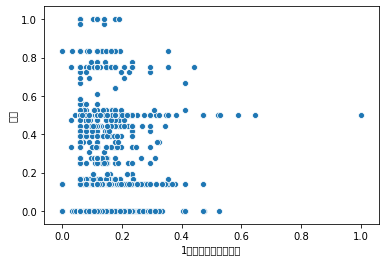

In [36]:
import seaborn as sns
sns.scatterplot(mD['1회당평균구매물품수'], mD['거리'])

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: 

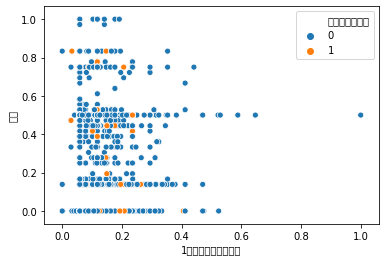

In [37]:
sns.scatterplot(mD['1회당평균구매물품수'], mD['거리'], hue = mD['모바일알람여부'])

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: 

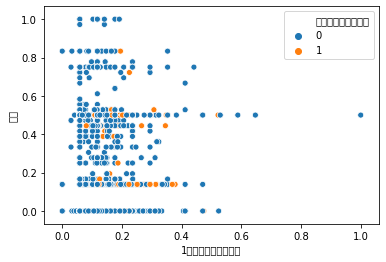

In [38]:
sns.scatterplot(mD['1회당평균구매물품수'], mD['거리'], hue = mD['배송서비스신청여부'])

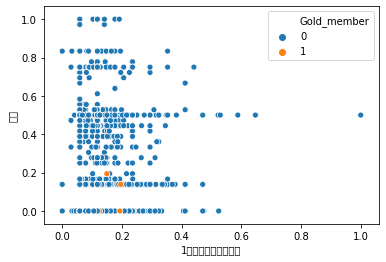

In [39]:
sns.scatterplot(mD['1회당평균구매물품수'], mD['거리'], hue = mD['Gold_member'])

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: 

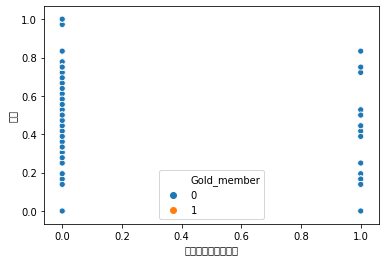

In [86]:
sns.scatterplot(mD['배송서비스신청여부'], mD['거리'], hue = mD['Gold_member'])

In [87]:
mD[mD['배송서비스신청여부'] == 1]['거리'].mean()

0.11180555555555564

In [88]:
mD[mD['배송서비스신청여부'] == 0]['거리'].mean()

0.16267899220590923

In [94]:
memberD[memberD['배송서비스신청여부'] == 1].groupby(['동','Gold_member'])['방문횟수'].count().unstack()#.sort_values(ascending = False)

Gold_member,0
동,
구미동,2
기타,21
동천동,1
삼평동,2
상현동,5
성복동,48
신봉동,114
중동,2
판교동,1


In [97]:
memberD[memberD['배송서비스신청여부'] == 0].groupby(['동','Gold_member'])['방문횟수'].count().unstack()#.sort_values(ascending = False)

Gold_member,0,1
동,,
고림동,1.0,NaN
공세동,2.0,NaN
구미동,9.0,NaN
궁내동,2.0,NaN
금곡동,2.0,NaN
금광동,1.0,NaN
기타,316.0,1.0
단대동,1.0,NaN
동백동,3.0,NaN


In [98]:
print(mD[mD['Gold_member'] == 0]['거리'].mean())
print(mD[mD['Gold_member'] == 1]['거리'].mean())

0.1597498893315631
0.02419354838709677


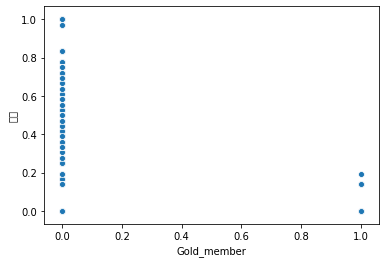

In [99]:
sns.scatterplot(mD['Gold_member'], mD['거리'])#, hue = mD['Gold_member'])

In [161]:
plt.rcParams['font.family'] = 'Malgun Gothic'

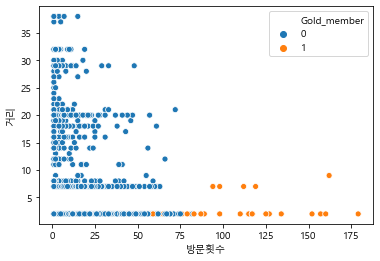

In [162]:
sns.scatterplot(memberD['방문횟수'], memberD['거리'], hue = memberD['Gold_member'])

In [163]:
memberD[memberD['Gold_member'] == 1]['거리'].mean()

2.870967741935484

In [164]:
memberD[memberD['Gold_member'] == 0]['거리'].mean()

7.750996015936255

In [165]:
memberD.groupby(['연령대','Gold_member'])['거리'].agg('mean').unstack()

Gold_member,0,1
연령대,,
20대이하,9.750000,NaN
30대,10.140221,NaN
40대,8.015759,3.090909
50대,7.919622,2.000000
60대,6.797183,3.111111
70대이상,5.454545,3.000000


In [167]:
memberD.columns

Index(['회원번호', '조합원상태', '성별', '연령', '배송서비스신청여부', '모바일알람여부', 'Gold_member',
       '연령대', '구매금액', '구', '동', '연령60이상', '방문횟수', '연령대_4560대', '구매매장', '간식',
       '건강', '과실', '기타', '반찬', '생활용품', '서류', '수산', '양념/가루', '음료', '잡곡', '주곡',
       '주류', '채소', '축산물', '주말', '평일', '1회당평균구매물품수', '거리'],
      dtype='object')

In [169]:
memberD.groupby(['배송서비스신청여부','모바일알람여부','Gold_member'])['Gold_member'].count().unstack()

Gold_member             0     1
배송서비스신청여부 모바일알람여부              
0         0        1696.0  11.0
          1         112.0  20.0
1         0         199.0   NaN
          1           1.0   NaN

# 50대 고객 군집

In [28]:
km_50

,ClusterKmeans,배송서비스신청여부_mean,모바일알람여부_mean,Gold_member_mean,구매금액_mean,방문횟수_mean,간식_mean,건강_mean,과실_mean,기타_mean,반찬_mean,생활용품_mean,서류_mean,수산_mean,양념/가루_mean,음료_mean,잡곡_mean,주곡_mean,주류_mean,채소_mean,축산물_mean,평일_mean,1회당평균구매물품수_mean,거리_mean,연령대_20대이하_mean,연령대_30대_mean,연령대_40대_mean,연령대_50대_mean,연령대_60대_mean,연령대_70대이상_mean,구매매장_매장D_mean
2,3,0.0,0.212329,0.041096,0.062116,0.086848,0.197664,0.026864,0.017880,0.000856,0.139935,0.048082,0.005066,0.069963,0.071367,0.050098,0.020264,0.010257,0.000201,0.165276,0.176227,0.323262,0.121224,0.154110,0.000000,0,0.0,1.000000,0,0.0,1
9,10,1.0,0.000000,0.000000,0.101416,0.131710,0.146534,0.007575,0.036433,0.000582,0.113816,0.030383,0.007156,0.087462,0.041296,0.020314,0.013424,0.017636,0.000635,0.260792,0.215962,0.581718,0.158893,0.103704,0.000000,0,0.0,1.000000,0,0.0,1
10,11,0.0,0.020833,0.000000,0.026638,0.038600,0.125533,0.013238,0.034039,0.001065,0.133236,0.044283,0.013168,0.092393,0.093515,0.046257,0.010858,0.015672,0.000471,0.246685,0.129586,0.848423,0.125005,0.178472,0.008333,0,0.0,0.991667,0,0.0,1


## 50대 고객 군집 해석 (3번 146, 10번 45, 11번 240)
### 3, 10번 군집의 관계
3번 군집 : 모바일알람을 이용하는 고객 대부분과 모든 vip 고객으로 형성됨. 평일보단 주말에 오는 비중이 높으며 구매금액, 방문횟수, 거리, 1회당평균구매물품수 등의 지표에서 중간의 값을 보임. 다른 군집보다 간식을 많이 삼.  
10번 군집 : 배송서비스를 신청한 고객들로만 이루어짐. 구매금액과 방문횟수가 가장 높다. 거리로는 가장 가까우며 평일과 주말 반반 오간다.
### 11번 군집은 거리가 멀고 주로 평일에 방문하는 고객들
11번 군집 : 구매력, 방문빈도 모두 최하. 서류 대분류품목을 많이 사가지만 큰 특징은 없어보임

In [51]:
total4

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829.0,매장A,NaN,10:32,1,화
1,2018-01-02,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977.0,매장A,NaN,10:41,1,화
2,2018-01-02,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:00,1,화
3,2018-01-02,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083.0,매장A,NaN,11:28,1,화
4,2018-01-02,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:59,1,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292019,2018-10-31,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315.0,매장D,NaN,13:16,10,수
292020,2018-10-31,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892.0,매장D,NaN,11:08,10,수
292021,2018-10-31,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466.0,매장D,NaN,14:27,10,수
292022,2018-10-31,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3733.0,매장D,NaN,16:02,10,수


## 군집별로 많이 팔린 대, 중, 소분류, 물품명(구매수량(count) 기준)

In [52]:
d_sales = total4[total4['구매매장'] == "매장D"]


In [56]:
d_merge = memberD[['회원번호','ClusterKmeans']].merge(d_sales, on = '회원번호', how = 'left')
d_merge

,회원번호,ClusterKmeans,공급일자,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
0,1000330176,12,2018-01-02,정상회원,간식,떡,즉석떡,쑥인절미(180g),1.0,4786.0,매장D,NaN,15:26,1,화
1,1000330176,12,2018-01-18,정상회원,채소,양념채소,대파,대파(500g),1.0,4020.0,매장D,NaN,16:35,1,목
2,1000330176,12,2018-01-18,정상회원,채소,버섯,새송이버섯,새송이버섯(300g),1.0,7370.0,매장D,NaN,16:35,1,목
3,1000330176,12,2018-01-30,정상회원,서류,고구마,호박고구마,호박고구마(2kg),1.0,16081.0,매장D,NaN,16:19,1,화
4,1000330176,12,2018-03-08,정상회원,축산물,닭/오리,무항생제닭,삼계닭(2마리/국내산),1.0,22590.0,매장D,NaN,14:31,3,목
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49607,999738112,12,2018-05-06,정상회원,반찬,두부/유부,두부,두부(1모:420g),2.0,7658.0,매장D,NaN,15:43,5,일
49608,999738112,12,2018-05-06,정상회원,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1.0,5743.0,매장D,NaN,15:43,5,일
49609,999738112,12,2018-06-17,정상회원,간식,떡,기타(냉동 등),냉동흑미건강떡(80g*5봉),1.0,13975.0,매장D,NaN,15:22,6,일
49610,999738112,12,2018-06-17,정상회원,간식,식사대용,씨리얼,딸기아침(80g),2.0,9189.0,매장D,NaN,15:23,6,일


In [68]:
test_cluster = d_merge[d_merge['ClusterKmeans']==1]
big_class = test_cluster.groupby(['물품대분류'])['구매수량'].count().sort_values(ascending = False)

In [69]:
df_big_class = pd.DataFrame(data = {'대분류명' : big_class.index, '수량' : big_class})
df_big_class.reset_index(drop = True, inplace = True)
df_big_class.rename(columns = {'대분류명' : str(1) + '_대분류명', '수량' : str(1) + '_수량'}, inplace = True)
df_big_class

,1_대분류명,1_수량
0,채소,1373
1,축산물,840
2,간식,728
3,반찬,472
4,수산,322
5,과실,207
6,음료,204
7,생활용품,162
8,양념/가루,156
9,서류,84


In [70]:
df_big_1 = df_big_class.sort_values('1_수량', ascending = False)
df_big_1

,1_대분류명,1_수량
0,채소,1373
1,축산물,840
2,간식,728
3,반찬,472
4,수산,322
5,과실,207
6,음료,204
7,생활용품,162
8,양념/가루,156
9,서류,84


In [76]:
for i in range(2, 13):
    test_cluster = d_merge[d_merge['ClusterKmeans']==i]
    
    big_class = test_cluster.groupby(['물품대분류'])['구매수량'].count().sort_values(ascending = False)
    df_big_class = pd.DataFrame(data = {'대분류명' : big_class.index, '수량' : big_class})
    df_big_class.reset_index(drop = True, inplace = True)
    df_big_class.rename(columns = {'대분류명' : str(i) + '_대분류명', '수량' : str(i) + '_수량'}, inplace = True)
    df_big_1 = df_big_1.merge(df_big_class, left_index = True, right_index = True, how = 'left')
    
    mid_class = test_cluster.groupby(['물품중분류'])['구매수량'].count().sort_values(ascending = False)
    df_mid_class = pd.DataFrame(data = {'중분류명' : mid_class.index, '수량' : mid_class})
    df_mid_class.reset_index(drop = True, inplace = True)
    df_mid_class.rename(columns = {'중분류명' : str(i) + '_중분류명', '수량' : str(i) + '_수량'}, inplace = True)
    df_mid_1 = df_mid_1.merge(df_mid_class, left_index = True, right_index = True, how = 'left')
    
    low_class = test_cluster.groupby(['물품소분류'])['구매수량'].count().sort_values(ascending = False)
    df_low_class = pd.DataFrame(data = {'소분류명' : low_class.index, '수량' : low_class})
    df_low_class.reset_index(drop = True, inplace = True)
    df_low_class.rename(columns = {'소분류명' : str(i) + '_소분류명', '수량' : str(i) + '_수량'}, inplace = True)
    df_low_1 = df_low_1.merge(df_low_class, left_index = True, right_index = True, how = 'left')
    
    item_class = test_cluster.groupby(['물품명'])['구매수량'].count().sort_values(ascending = False)
    df_item_class = pd.DataFrame(data = {'물품명' : item_class.index, '수량' : item_class})
    df_item_class.reset_index(drop = True, inplace = True)
    df_item_class.rename(columns = {'물품명' : str(i) + '_물품명', '수량' : str(i) + '_수량'}, inplace = True)
    df_item_1 = df_low_1.merge(df_item_class, left_index = True, right_index = True, how = 'left')

In [84]:
for i in range(2,13):
    test_cluster = d_merge[d_merge['ClusterKmeans']==i]
    
    item_class = test_cluster.groupby(['물품명'])['구매수량'].count().sort_values(ascending = False)
    df_item_class = pd.DataFrame(data = {'물품명' : item_class.index, '수량' : item_class})
    df_item_class.reset_index(drop = True, inplace = True)
    df_item_class.rename(columns = {'물품명' : str(i) + '_물품명', '수량' : str(i) + '_수량'}, inplace = True)
    df_item_1 = df_item_1.merge(df_item_class, left_index = True, right_index = True, how = 'left')

In [74]:
test_cluster = d_merge[d_merge['ClusterKmeans']==1]
mid_class = test_cluster.groupby(['물품중분류'])['구매수량'].count().sort_values(ascending = False)
df_mid_class = pd.DataFrame(data = {'중분류명' : mid_class.index, '수량' : mid_class})
df_mid_class.reset_index(drop = True, inplace = True)
df_mid_class.rename(columns = {'중분류명' : str(1) + '_중분류명', '수량' : str(1) + '_수량'}, inplace = True)
df_mid_1 = df_mid_1.merge(df_mid_class, left_index = True, right_index = True, how = 'left')
df_mid_1 = df_mid_class.sort_values('1_수량', ascending = False).head(20)
df_mid_1

,1_중분류명,1_수량
0,잎/줄기채소,346
1,열매채소,295
2,유제품,216
3,알,211
4,두부/유부,210
5,빵,188
6,음료,187
7,과자,185
8,과일,181
9,과일채소,166


In [75]:
test_cluster = d_merge[d_merge['ClusterKmeans']==1]
low_class = test_cluster.groupby(['물품소분류'])['구매수량'].count().sort_values(ascending = False)
df_low_class = pd.DataFrame(data = {'소분류명' : low_class.index, '수량' : low_class})
df_low_class.reset_index(drop = True, inplace = True)
df_low_class.rename(columns = {'소분류명' : str(1) + '_소분류명', '수량' : str(1) + '_수량'}, inplace = True)
#df_low_1 = df_low_1.merge(df_low_class, left_index = True, right_index = True, how = 'left')
df_low_1 = df_low_class.sort_values('1_수량', ascending = False).head(20)
df_low_1

,1_소분류명,1_수량
0,유정란,177
1,두부,177
2,우유/산양유,137
3,스낵,136
4,오이,103
5,김가공,98
6,"식빵, 식사대용",95
7,과즙,88
8,보리살림(냉장),78
9,양파,78


In [83]:
test_cluster = d_merge[d_merge['ClusterKmeans']==1]
item_class = test_cluster.groupby(['물품명'])['구매수량'].count().sort_values(ascending = False)
df_item_class = pd.DataFrame(data = {'물품명' : item_class.index, '수량' : item_class})
df_item_class.reset_index(drop = True, inplace = True)
df_item_class.rename(columns = {'물품명' : str(1) + '_물품명', '수량' : str(1) + '_수량'}, inplace = True)
#df_item_1 = df_low_1.merge(df_item_class, left_index = True, right_index = True, how = 'left')
df_item_1 = df_item_class.sort_values('1_수량', ascending = False).head(30)
df_item_1

,1_물품명,1_수량
0,두부(1모:420g),104
1,오이(3개),89
2,유정란/매장용(15알/국내산),65
3,콩나물(300g),64
4,찌개용두부(420g),57
5,유기농성이시돌목장우유(900ml),55
6,양파(1kg),48
7,애호박(1개),40
8,당근(500g),39
9,유기농저지방우유(종이팩/900ml),37


In [77]:
df_big_1

,1_대분류명,1_수량,2_대분류명,2_수량,3_대분류명,3_수량,4_대분류명,4_수량,5_대분류명,5_수량,6_대분류명,6_수량,7_대분류명,7_수량,8_대분류명,8_수량,9_대분류명,9_수량,10_대분류명,10_수량,11_대분류명,11_수량,12_대분류명,12_수량
0,채소,1373,축산물,192.0,채소,1327,채소,620.0,채소,1134,채소,2918,축산물,632,간식,242.0,채소,1458,채소,604,채소,991,채소,2253
1,축산물,840,간식,186.0,축산물,783,간식,386.0,간식,983,축산물,1301,간식,617,채소,231.0,축산물,1300,축산물,459,축산물,541,축산물,1223
2,간식,728,채소,98.0,간식,671,축산물,318.0,축산물,908,반찬,1010,채소,555,축산물,171.0,간식,1041,간식,277,반찬,428,반찬,863
3,반찬,472,음료,71.0,반찬,530,반찬,267.0,반찬,619,간식,977,반찬,365,반찬,169.0,반찬,824,반찬,232,간식,373,간식,844
4,수산,322,반찬,65.0,수산,333,수산,183.0,음료,411,수산,581,수산,198,음료,76.0,수산,431,수산,192,수산,260,수산,572
5,과실,207,수산,53.0,음료,172,양념/가루,152.0,수산,345,양념/가루,397,음료,184,수산,72.0,음료,382,양념/가루,98,양념/가루,192,양념/가루,375
6,음료,204,양념/가루,32.0,과실,171,음료,91.0,양념/가루,274,과실,360,양념/가루,158,생활용품,60.0,양념/가루,342,과실,82,과실,136,과실,303
7,생활용품,162,생활용품,29.0,양념/가루,163,과실,84.0,생활용품,262,음료,202,생활용품,140,양념/가루,51.0,생활용품,261,생활용품,61,음료,134,음료,244
8,양념/가루,156,서류,14.0,생활용품,158,생활용품,59.0,과실,144,주곡,149,과실,88,주곡,21.0,과실,183,음료,46,생활용품,101,생활용품,173
9,서류,84,과실,12.0,잡곡,81,잡곡,44.0,서류,68,잡곡,149,주곡,59,과실,21.0,주곡,87,주곡,43,주곡,49,주곡,154


In [78]:
df_mid_1

,1_중분류명,1_수량,2_중분류명,2_수량,3_중분류명,3_수량,4_중분류명,4_수량,5_중분류명,5_수량,6_중분류명,6_수량,7_중분류명,7_수량,8_중분류명,8_수량,9_중분류명,9_수량,10_중분류명,10_수량,11_중분류명,11_수량,12_중분류명,12_수량
0,잎/줄기채소,346,알,64,잎/줄기채소,352,두부/유부,176,음료,382,잎/줄기채소,873,과자,201,밀가공,73,두부/유부,432,두부/유부,141,잎/줄기채소,270,잎/줄기채소,662
1,열매채소,295,음료,61,두부/유부,329,잎/줄기채소,153,과자,369,두부/유부,672,알,189,두부/유부,69,알,390,잎/줄기채소,129,두부/유부,235,두부/유부,572
2,유제품,216,과자,45,열매채소,209,알,124,두부/유부,275,열매채소,548,음료,158,빵,68,잎/줄기채소,340,알,128,알,196,알,492
3,알,211,유제품,45,유제품,207,과자,114,잎/줄기채소,253,알,498,유제품,135,음료,66,음료,338,유제품,118,양념채소,146,열매채소,412
4,두부/유부,210,밀가공,43,알,194,밀가공,91,알,235,양념채소,391,두부/유부,133,과자,48,유제품,313,열매채소,108,열매채소,139,양념채소,296
5,빵,188,두부/유부,39,양념채소,190,빵,89,유제품,230,과일,313,밀가공,124,양념채소,44,과자,275,양념채소,105,과일,118,과일,257
6,음료,187,빵,31,밀가공,181,뿌리채소,88,밀가공,180,유제품,312,빵,117,알,44,밀가공,256,돼지,75,콩나물,105,과자,249
7,과자,185,식사대용,28,빵,161,양념채소,87,밑반찬,172,뿌리채소,258,밑반찬,105,밑반찬,43,양념채소,236,과일,67,밀가공,102,유제품,241
8,과일,181,떡,27,과일,152,열매채소,86,빵,170,밀가공,242,잎/줄기채소,105,육가공,42,육가공,235,밀가공,66,뿌리채소,100,음료,217
9,과일채소,166,육가공,25,음료,145,음료,81,열매채소,164,과일채소,226,육가공,100,잎/줄기채소,39,열매채소,229,과자,65,음료,99,뿌리채소,215


In [79]:
df_low_1

,1_소분류명,1_수량,2_소분류명,2_수량,3_소분류명,3_수량,4_소분류명,4_수량,5_소분류명,5_수량,6_소분류명,6_수량,7_소분류명,7_수량,8_소분류명,8_수량,9_소분류명,9_수량,10_소분류명,10_수량,11_소분류명,11_수량,12_소분류명,12_수량
0,유정란,177,유정란,51,두부,281,두부,159,스낵,317,두부,600,스낵,164,두부,62,두부,391,두부,119,두부,206,두부,507
1,두부,177,스낵,34,유정란,146,유정란,99,두부,238,유정란,331,유정란,141,스낵,33,유정란,310,유정란,87,유정란,158,유정란,361
2,우유/산양유,137,두부,33,우유/산양유,122,스낵,83,유정란,173,우유/산양유,217,두부,119,"식빵, 식사대용",31,스낵,210,우유/산양유,73,콩나물,94,스낵,194
3,스낵,136,우유/산양유,27,콩나물,106,콩나물,57,김가공,149,오이,185,김가공,77,보리살림(냉장),31,우유/산양유,205,보리살림(냉장),47,양파,59,콩나물,183
4,오이,103,과즙,21,스낵,93,오이,38,과즙,149,스낵,180,우유/산양유,67,김가공,29,콩나물,139,스낵,46,우유/산양유,57,우유/산양유,160
5,김가공,98,즉석떡,21,양파,82,"식빵, 식사대용",36,우유/산양유,128,논지엠오유정란,156,과즙,60,유정란,27,김가공,126,콩나물,44,스낵,56,멥쌀,123
6,"식빵, 식사대용",95,식사대용/기타,14,오이,71,과즙,36,푸딩,97,콩나물,149,"식빵, 식사대용",56,어묵,26,과즙,109,논지엠오유정란,41,당근,49,논지엠오유정란,122
7,과즙,88,아이스크림,14,보리살림(냉장),69,양파,34,콩나물,91,양파,134,논지엠오유정란,46,라면,24,양파,109,양파,38,기름,44,오이,116
8,보리살림(냉장),78,만두,13,"식빵, 식사대용",69,멸치류,34,양파,82,중파,113,햄/소시지/훈제,45,햄/소시지/훈제,23,햄/소시지/훈제,99,멥쌀,35,김가공,43,애호박,100
9,양파,78,논지엠오유정란,13,멥쌀,63,보리살림(냉장),33,"식빵, 식사대용",70,멥쌀,112,멥쌀,45,두유,21,무항생제닭,88,오이,34,어묵,42,양파,99


In [85]:
df_item_1

,1_물품명,1_수량,2_물품명,2_수량,3_물품명,3_수량,4_물품명,4_수량,5_물품명,5_수량,6_물품명,6_수량,7_물품명,7_수량,8_물품명,8_수량,9_물품명,9_수량,10_물품명,10_수량,11_물품명,11_수량,12_물품명,12_수량
0,두부(1모:420g),104,유정란/매장용(15알/국내산),27,두부(1모:420g),185,두부(1모:420g),93,두부(1모:420g),141,두부(1모:420g),352,유정란/매장용(15알/국내산),74,두부(1모:420g),40,두부(1모:420g),225,두부(1모:420g),79,두부(1모:420g),137,두부(1모:420g),306
1,오이(3개),89,두부(1모:420g),24,콩나물(300g),106,콩나물(300g),57,유정란/매장용(15알/국내산),90,찌개용두부(420g),196,두부(1모:420g),73,명태참어묵(300g),20,유정란/매장용(15알/국내산),148,콩나물(300g),44,콩나물(300g),93,콩나물(300g),183
2,유정란/매장용(15알/국내산),65,유기농저지방우유(종이팩/900ml),15,유정란/매장용(15알/국내산),72,찌개용두부(420g),47,콩나물(300g),89,유정란/매장용(15알/국내산),187,당근(500g),35,찌개용두부(420g),19,콩나물(300g),139,유정란/매장용(안심대안사료/15알),32,유정란/매장용(15알/국내산),68,유정란/매장용(15알/국내산),163
3,콩나물(300g),64,콩나물(300g),9,찌개용두부(420g),70,유정란/매장용(15알/국내산),36,찌개용두부(420g),62,콩나물(300g),148,콩나물(300g),34,콩나물(300g),17,찌개용두부(420g),127,유정란/매장용(15알/국내산),28,찌개용두부(420g),54,찌개용두부(420g),153
4,찌개용두부(420g),57,유정란/매장용(10알/국내산),9,오이(3개),60,오이(3개),30,당근(500g),52,오이(3개),138,찌개용두부(420g),34,양파(1kg),13,유기농우유(종이팩/900ml),69,찌개용두부(420g),27,당근(500g),40,오이(3개),96
5,유기농성이시돌목장우유(900ml),55,유정란/매장용(안심대안사료/15알),8,양파(1kg),50,유정란/매장용(10알/국내산),23,팽이버섯(150g),46,유정란/매장용(안심대안사료/15알),108,유정란/매장용(안심대안사료/15알),33,검은콩두유(160ml*5봉),13,양파(1kg),64,오이(3개),26,양파(1kg),36,유정란/매장용(안심대안사료/15알),88
6,양파(1kg),48,오이(3개),7,명태참어묵(300g),40,당근(500g),20,양파(1kg),45,중파(500g),103,딸기잼(480g),29,중파(500g),13,당근(500g),55,유기농성이시돌목장우유(900ml),25,유정란/매장용(10알/국내산),34,유정란/매장용(10알/국내산),75
7,애호박(1개),40,딸기잼(480g),7,중파(500g),38,중파(500g),19,유정란/매장용(안심대안사료/15알),42,시금치(300g),89,유정란/매장용(10알/국내산),25,유정란/매장용(안심대안사료/15알),12,유정란/매장용(안심대안사료/15알),54,유정란/매장용(10알/국내산),24,유정란/매장용(안심대안사료/15알),29,중파(500g),71
8,당근(500g),39,말랑말랑백미가래떡(400g),7,유정란/매장용(10알/국내산),36,양파(1kg),17,검은콩두유(160ml*5봉),40,당근(500g),74,양파(1kg),25,오이(3개),11,오이(3개),51,양파(1kg),22,오이(3개),28,애호박(1개),69
9,유기농저지방우유(종이팩/900ml),37,찌개용두부(420g),7,검은콩두유(160ml*5봉),35,유정란/매장용(안심대안사료/15알),17,시금치(300g),37,어린잎채소(100g),70,명태참어묵(300g),24,구운도시락김(5g*3봉),11,유정란/매장용(10알/국내산),50,중파(500g),22,시금치(300g),27,양파(1kg),52


## 40대 고객 군집 해석 (1번 61, 2번 140, 7번 64, 8번 115, 9번 333)
### 1, 7번 군집의 관계
1번 군집 : 모바일알람을 이용하며 동시에 vip 고객들은 전부 1번 군집. vip다 -> 모바일알람을 사용한다라는 명제 만족. 구매금액과 방문횟수 또한 가장 크다  
7번 군집: 배송서비스를 신청한 모든 40대 고객. 1회당평균구매물품수가 가장 높은 군집이다.  
### 2, 8번 군집의 관계
2번 군집 : 매장과의 거리가 먼 고객들로 구성되있다. 거리 평균이 가장 높고 대부분 평일에 방문한다. 평일 방문율이 93%라는 높은 수치를 보인다.  
8번 군집 : 2번 군집만큼은 아니지만 거리가 먼 고객들로 구성되있다. 다만 2번과의 차이점은 평일 방문율이 극히 낮다는 것. 거리는 먼데 주말에 방문하는 고객들로 구성된 군집이다.  
### 9번은 가까이 사는 고객들
거리 평균이 가장 가까운 고객들이 9번 군집으로 형성된 듯. 1회당평균구매물품수가 가장 낮다. 다세대나 1인가구에서 1회당평균구매물품수가 차이가 있을 것으로 보였지만 거리에 비례할수도 있다는 생각이 들었다.


In [113]:
d_merge[d_merge['물품대분류'] == "간식"]['물품중분류'].unique()

array(['떡', '과자', '빵', '밀가공', '식사대용', '잼/병조림/기타'], dtype=object)

In [112]:
d_merge[d_merge['물품중분류'] == "밀가공"]['물품소분류'].unique()

array(['국수', '만두', '면/기타', '생숙면', '라면', '피자/핫도그', '간편조리면'], dtype=object)

In [111]:
m7 = d_merge[d_merge['ClusterKmeans'] == 7]
#m7[m7['물품소분류'] == "스낵"]['물품명'].unique().sort_values(ascending = False)
m7[m7['물품소분류'] == "스낵"].groupby(['물품명'])['구매수량'].count().sort_values(ascending = False)

물품명
꿀을바른바삭한쌀스낵(80g)       13
오징어땅콩볼(100g)          12
하늘바다새우(60g)           12
찹쌀누룽지(300g)           10
누룽지(500g)             10
하늘땅감자(55g)             9
7곡딸기롤과자(100g/10개입)     7
두부과자(100g)             7
콩고물쌀과자(60g)            7
채소쌀과자(32g)             6
밥풀과자(소:80g)            6
우리밀곡물와플(80g)           6
도깨비방망이과자(80g)          6
우리밀유정란전병(150g)         5
꾸러기짱(90g)              5
단팝콘(80g)               4
감자쌀과자(32g)             4
진팝콘(50g)               3
밥풀과자(120g)             3
누룽지(소:90g)             3
옥수수튀밥(100g)            3
옥수수과자(32g)             2
우리밀보름달전병(150g)         2
우리밀채소쌀건빵(120g)         2
누룽지(300g)              2
바삭바삭크래커(80g)           2
통밀퐁(70g)               2
검정콩세알(190g)            1
흑미쌀과자(55g)             1
동그랑쌀과자(70g)            1
마늘빵과자(100g)            1
매일견과(25g)              1
백미뻥과자(55g)             1
현미뻥과자(55g)             1
어린이달과자(70g)            1
오곡퐁(150g)              1
찰옥수수퐁(100g)            1
부숴먹는라면(90g:1봉)         1
Name: 구매수량, dtype: int64

In [ ]:
mfile_merge = total4.merge(mfile.drop(['조합원상태','구매금액'], axis = 1), on = '회원번호', how = 'inner')
mfile_merge

In [151]:
d_merge

,회원번호,ClusterKmeans,공급일자,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
0,1000330176,12,2018-01-02,정상회원,간식,떡,즉석떡,쑥인절미(180g),1.0,4786.0,매장D,NaN,15:26,1,화
1,1000330176,12,2018-01-18,정상회원,채소,양념채소,대파,대파(500g),1.0,4020.0,매장D,NaN,16:35,1,목
2,1000330176,12,2018-01-18,정상회원,채소,버섯,새송이버섯,새송이버섯(300g),1.0,7370.0,매장D,NaN,16:35,1,목
3,1000330176,12,2018-01-30,정상회원,서류,고구마,호박고구마,호박고구마(2kg),1.0,16081.0,매장D,NaN,16:19,1,화
4,1000330176,12,2018-03-08,정상회원,축산물,닭/오리,무항생제닭,삼계닭(2마리/국내산),1.0,22590.0,매장D,NaN,14:31,3,목
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49607,999738112,12,2018-05-06,정상회원,반찬,두부/유부,두부,두부(1모:420g),2.0,7658.0,매장D,NaN,15:43,5,일
49608,999738112,12,2018-05-06,정상회원,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1.0,5743.0,매장D,NaN,15:43,5,일
49609,999738112,12,2018-06-17,정상회원,간식,떡,기타(냉동 등),냉동흑미건강떡(80g*5봉),1.0,13975.0,매장D,NaN,15:22,6,일
49610,999738112,12,2018-06-17,정상회원,간식,식사대용,씨리얼,딸기아침(80g),2.0,9189.0,매장D,NaN,15:23,6,일


In [21]:
mfile

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구매금액,구,동,연령60이상,방문횟수,연령대_4560대
0,1000012800,1,0,58.0,0,0,0,50대,7658.0,수지구,풍덕천동,0,1,1
1,1000103744,1,0,34.0,0,0,0,30대,36948.0,처인구,고림동,0,1,0
2,1000122304,1,0,38.0,0,0,0,30대,142831.0,광주,기타,0,15,0
3,1000163136,1,0,73.0,0,0,0,70대이상,138892.0,수지구,동천동,1,4,0
4,1000281920,1,0,42.0,1,0,0,40대,632554.0,수지구,풍덕천동,0,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,999682432,0,0,47.0,0,0,0,40대,39246.0,수지구,동천동,0,1,1
11538,999721408,1,0,43.0,0,0,0,40대,43457.0,수지구,동천동,0,2,1
11539,999738112,1,0,67.0,0,0,0,60대,152960.0,수지구,성복동,1,9,1
11540,999754816,1,0,44.0,1,0,0,40대,641334.0,수지구,상현동,0,21,1


In [17]:
dt_D.groupby(['배송서비스신청여부','모바일알람여부'])['모바일알람여부'].count().unstack()

KeyError: '배송서비스신청여부'

In [15]:
mfile_merge = total4.merge(mfile.drop(['조합원상태','구매금액'], axis = 1), on = '회원번호', how = 'inner')
mfile_merge

NameError: name 'total4' is not defined

In [172]:
memberD.groupby(['Gold_member'])['평일'].agg('mean')

Gold_member
0    0.645736
1    0.623997
Name: 평일, dtype: float64

In [173]:
memberD.groupby(['Gold_member'])['거리'].agg('mean')

Gold_member
0    7.750996
1    2.870968
Name: 거리, dtype: float64